In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier

from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
print(data.head())
data.shape

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


(10000, 3)

Text(0.5, 1.0, 'Full Dataset')

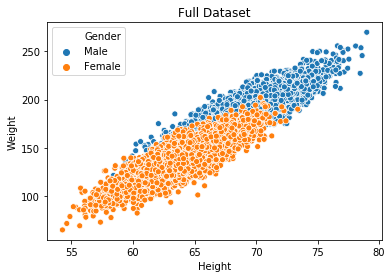

In [4]:
sns.scatterplot(x = 'Height', y = 'Weight', hue = 'Gender', data=data)
plt.title('Full Dataset')

(5000, 3) (5000, 3)


(64.0, 269.0)

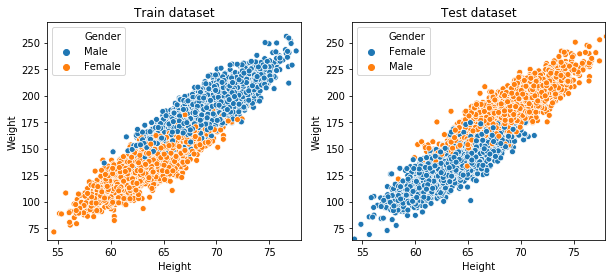

In [24]:
# Split data to train and test
train, test = train_test_split(data, test_size=0.5)
print(train.shape, test.shape)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.scatterplot(x = 'Height', y = 'Weight', hue = 'Gender', data=train)
plt.xlim((np.floor(data['Height'].min()), np.floor(data['Height'].max())))
plt.ylim((np.floor(data['Weight'].min()), np.floor(data['Weight'].max())))
plt.title('Train dataset')
plt.subplot(1,2,2)
sns.scatterplot(x = 'Height', y = 'Weight', hue = 'Gender', data=test)
plt.title('Test dataset')
plt.xlim((np.floor(data['Height'].min()), np.floor(data['Height'].max())))
plt.ylim((np.floor(data['Weight'].min()), np.floor(data['Weight'].max())))

# Imbalance sampling and it's effect on classification
https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [48]:
def imbalance_gen(dataset, prob = [0.5,0.5]):
    # By defalut it generates 50-50 from each calss
    len1 = np.round(dataset.shape[0] * prob[0]).astype(int)
    len2 = np.round(dataset.shape[0] * prob[1]).astype(int)
    dataset1 = dataset[dataset['Gender'] == 'Male']
    dataset2 = dataset[dataset['Gender'] == 'Female']
    #print('Original dataset class count, class1 = ', dataset1.shape[0], ' class2 = ', dataset2.shape[0])
    newdataset = pd.concat([dataset1.sample(n = len1, replace = True), 
                                dataset2.sample(n = len2, replace = True)])
    return newdataset
    

Original dataset class count, class1 =  2453  class2 =  2547


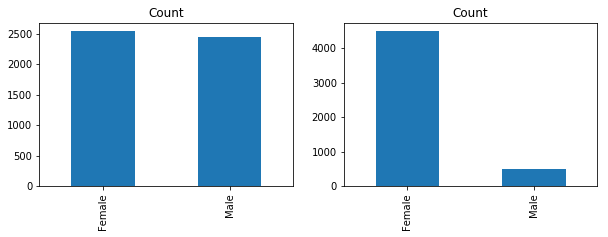

In [36]:
# checking imbalance dataset -- the reason for new dataset being imbalanced is the probabilities we applied to the balanced dataset
imbalance_data = imbalance_gen(test, prob = [0.1, 0.9])
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
test.Gender.value_counts().plot(kind='bar', title='Count');
plt.subplot(1,2,2)
imbalance_data.Gender.value_counts().plot(kind='bar', title='Count');

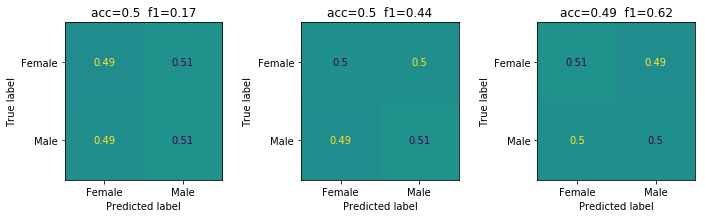

In [117]:
# Quation 1
# sample test data set with different probability -- these probabilities are just 3 samples 
probabilities = ([0.9, 0.1],[0.6,0.4],[0.2,0.8])
dummy = DummyClassifier(strategy="uniform")
ro = 1
fig = plt.figure(figsize=(12,6))
for prob in probabilities:
    imbalance_data = imbalance_gen(test, prob)

    dummy.fit(imbalance_data[['Height','Weight']], imbalance_data['Gender'])
    dummy_labels = dummy.predict(imbalance_data[['Height','Weight']])
    score = dummy.score(imbalance_data[['Height','Weight']], imbalance_data['Gender'])
    f1_test = f1_score(label_binarize(imbalance_data['Gender'].to_numpy(),classes = ['Male', 'Female']), 
                   label_binarize(dummy_labels, classes = ['Male', 'Female']), average = 'binary')
    ax = plt.subplot(1,len(probabilities),ro)
    disp = plot_confusion_matrix(dummy, imbalance_data[['Height','Weight']], imbalance_data['Gender'], normalize='true', ax = ax)
    ax.set_title('acc=' + np.str(np.round(score, decimals = 2)) + '  f1=' + np.str(np.round(f1_test, decimals = 2)))
    disp.im_.set_clim(0, 1)
    # remove the colorbar
    disp.im_.colorbar.remove()
    
    
    ro += 1

(5000, 2) (5000,) (5000, 2) (5000,)
starting  Nearest Neighbors
starting  Linear SVM
starting  RBF SVM
starting  Decision Tree
starting  Random Forest
starting  Neural Net
starting  AdaBoost
starting  Naive Bayes
starting  QDA


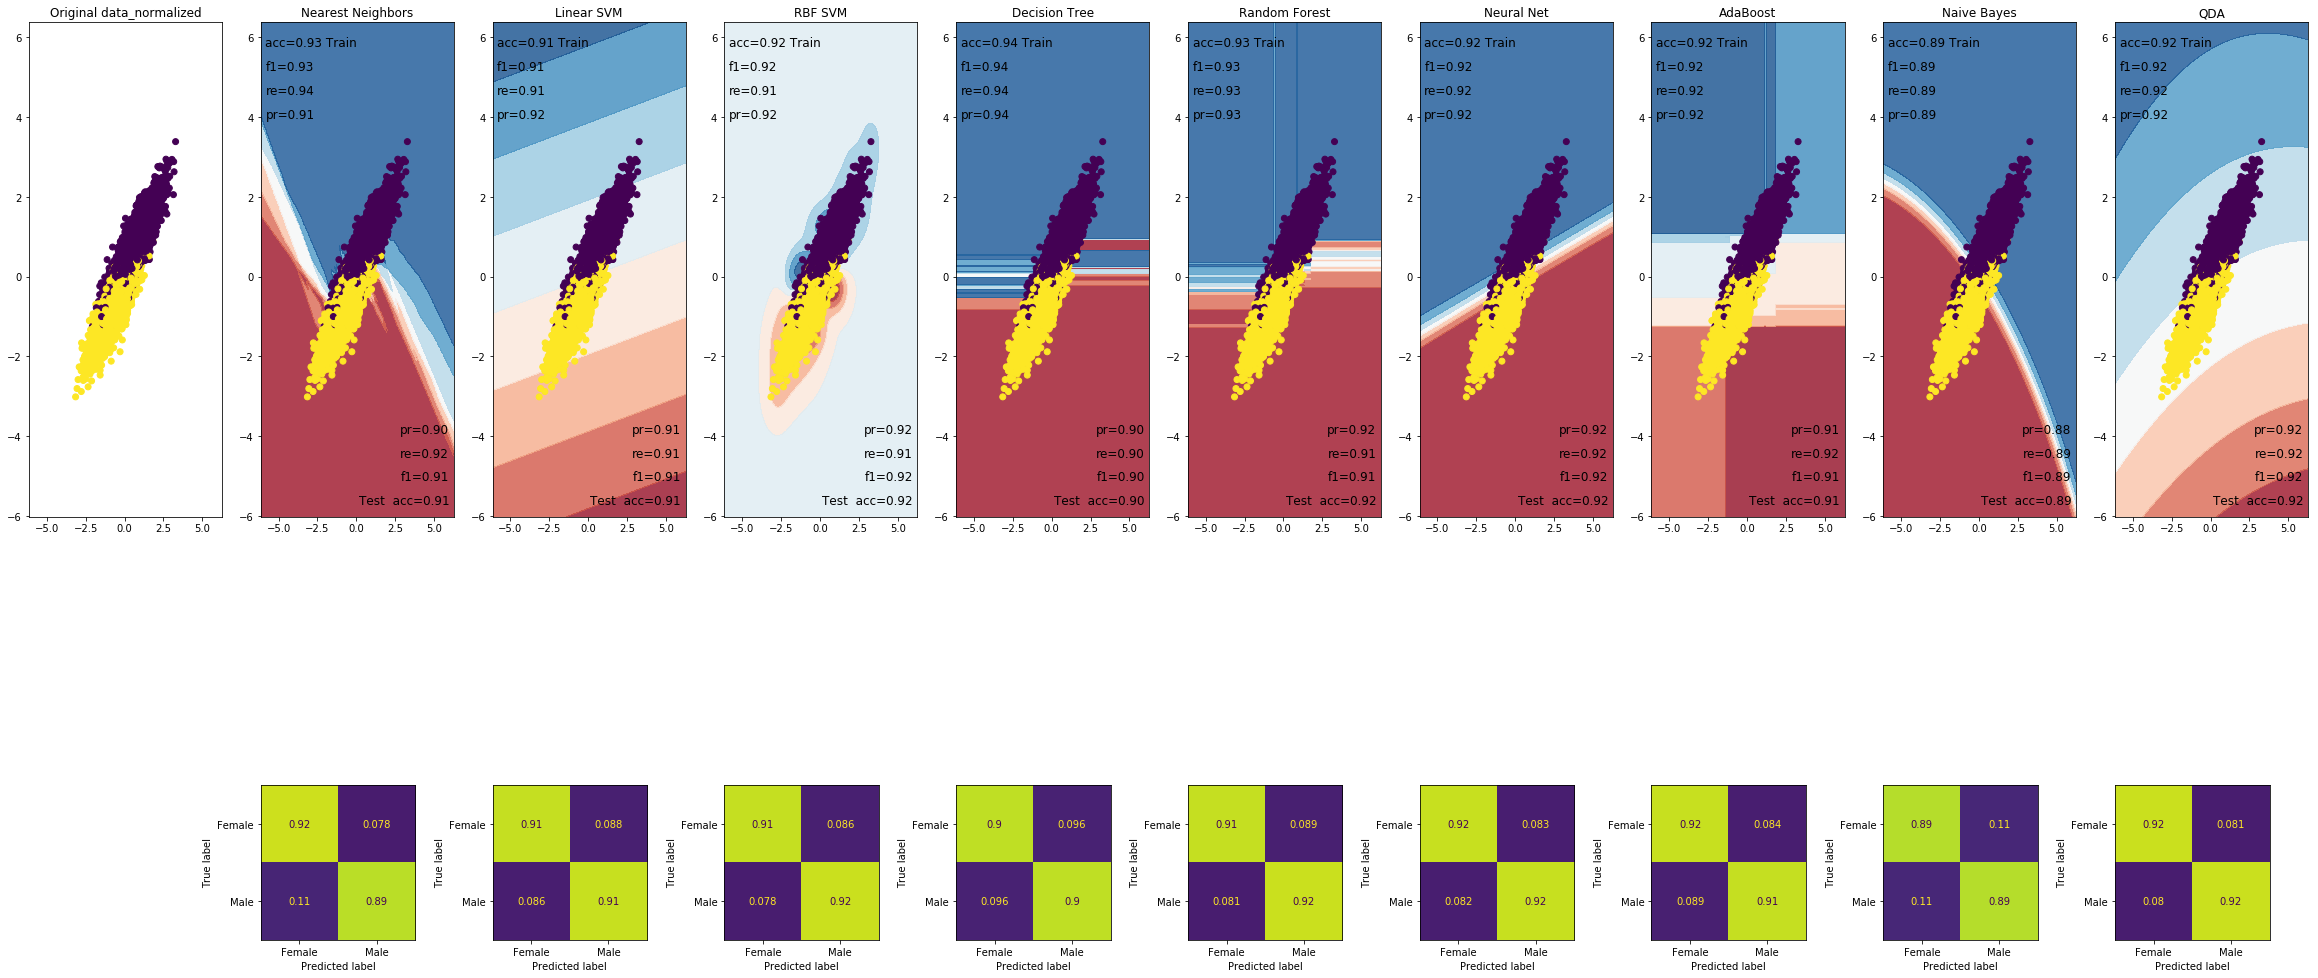

In [120]:
# Quation 2
# classifiying with 10 different methods as mentioned in names:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]#, "Gaussian Process"]

classifiers = [
    KNeighborsClassifier(6),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=7),
    RandomForestClassifier(max_depth=7, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
    #GaussianProcessClassifier(1.0 * RBF(1.0))]

# preparing dataset(we have to normalize dataset to min = 0, std = 1)
data_norm = StandardScaler().fit_transform(data[['Height', 'Weight']])
train_features, test_features, train_labels, test_labels = train_test_split(data_norm, 
                                                                            data['Gender'], test_size = 0.5)
print(train_features.shape, train_labels.shape, test_features.shape, test_labels.shape)

norm_x_min = data_norm[:,0].min()-3
norm_x_max = data_norm[:,0].max()+3
norm_y_min = data_norm[:,1].min()-3
norm_y_max = data_norm[:,1].max()+3
xx, yy = np.meshgrid(np.arange(norm_x_min, norm_x_max, h),
                         np.arange(norm_y_min, norm_y_max, h))

plt.figure(figsize=(45,20))
ax = plt.subplot(2,11,1)
ax.scatter(train_features[:,0], train_features[:,1], c = train_labels.map({"Male": 1, "Female": 2}))
ax.scatter(test_features[:,0], test_features[:,1], c = test_labels.map({"Male": 1, "Female": 2}))
ax.set_title('Original data_normalized')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# classifiers
ro = 2
for name, classifier_ in zip(names, classifiers):
    print('starting ', name)
    classifier_.fit(train_features, train_labels)
    score_train = classifier_.score(train_features, train_labels) #average accuracy
    score_test = classifier_.score(test_features, test_labels) #average accuracy
    pred_labels = classifier_.predict(test_features)
    pred_labels_train = classifier_.predict(train_features)
    if hasattr(classifier_, "decision_function"):
        Z = classifier_.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = classifier_.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
    f1_test = f1_score(label_binarize(test_labels.to_numpy(),classes = ['Male', 'Female']), 
                   label_binarize(pred_labels, classes = ['Male', 'Female']), average = 'binary')
    re_test = recall_score(label_binarize(test_labels.to_numpy(),classes = ['Male', 'Female']), 
                   label_binarize(pred_labels, classes = ['Male', 'Female']))
    pr_test = precision_score(label_binarize(test_labels.to_numpy(),classes = ['Male', 'Female']), 
                   label_binarize(pred_labels, classes = ['Male', 'Female']), average = 'binary')
    conf_test = confusion_matrix(label_binarize(test_labels.to_numpy(),classes = ['Male', 'Female']), 
                   label_binarize(pred_labels, classes = ['Male', 'Female']))
    conf_test = conf_test/conf_test.astype(np.float).sum(axis=1)
    
    f1_train = f1_score(label_binarize(train_labels.to_numpy(),classes = ['Male', 'Female']), 
                   label_binarize(pred_labels_train, classes = ['Male', 'Female']), average = 'binary')
    re_train = recall_score(label_binarize(train_labels.to_numpy(),classes = ['Male', 'Female']), 
                   label_binarize(pred_labels_train, classes = ['Male', 'Female']))
    pr_train = precision_score(label_binarize(train_labels.to_numpy(),classes = ['Male', 'Female']), 
                   label_binarize(pred_labels_train, classes = ['Male', 'Female']), average = 'binary')
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax = plt.subplot(2,11,ro)
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
    ax.scatter(train_features[:,0], train_features[:,1], 
               c = train_labels.map({"Male": 1, "Female": 2}))
    ax.scatter(test_features[:,0], test_features[:,1], 
               c = test_labels.map({"Male": 1, "Female": 2}))
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('Test  acc=' '%.2f' % score_test).lstrip('0'),
                size=12, horizontalalignment='right')
    ax.text(xx.max() - .3, yy.min() + .9, ('f1=' '%.2f' % f1_test).lstrip('0'),
                size=12, horizontalalignment='right')
    ax.text(xx.max() - .3, yy.min() + 1.5, ('re=' '%.2f' % re_test).lstrip('0'),
                size=12, horizontalalignment='right')
    ax.text(xx.max() - .3, yy.min() + 2.1, ('pr=' '%.2f' % pr_test).lstrip('0'),
                size=12, horizontalalignment='right')
    
    ax.text(xx.min() + .3, yy.max() - .6, ('acc=' '%.2f Train' % score_train).lstrip('0'),
                size=12, horizontalalignment='left')
    ax.text(xx.min() + .3, yy.max() - 1.2, ('f1=' '%.2f' % f1_train).lstrip('0'),
                size=12, horizontalalignment='left')
    ax.text(xx.min() + .3, yy.max() - 1.8, ('re=' '%.2f' % re_train).lstrip('0'),
                size=12, horizontalalignment='left')
    ax.text(xx.min() + .3, yy.max() - 2.4, ('pr=' '%.2f' % pr_train).lstrip('0'),
                size=12, horizontalalignment='left')
    
    ax = plt.subplot(2,11,ro+11)
    disp = plot_confusion_matrix(classifier_, test_features, test_labels, normalize='true', ax = ax)
    disp.im_.set_clim(0, 1)
    # remove the colorbar
    disp.im_.colorbar.remove()
    ro += 1


In [ ]:
True positive and true negatives are the observations that are correctly predicted. 
We want to minimize false positives and false negatives. These terms are a bit confusing. 
So let’s look a bit closer to each term:
    
True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes 
and the value of predicted class is also yes. 

True Negatives (TN) - These are the correctly predicted negative values which means that the value of 
actual class is no and value of predicted class is also no. 

False positives and false negatives, these values occur when your actual class contradicts with the predicted class. 

False Positives (FP) – When actual class is no and predicted class is yes. 

False Negatives (FN) – When actual class is yes but predicted class in no.

Now we can calculate Accuracy, Precision, Recall and F1 score. 

Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation 
to the total observations. One may think that, if we have high accuracy then our model is the best. 

Accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives 
are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. 

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

High precision relates to the low false positive rate. 

Recall is the ratio of correctly predicted positive observations to the all observations in actual class.

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives 
into account. 
Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, 
especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have 
similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both 
Precision and Recall. 

From the other side, the train results sometimes could be tricky. This means the most trustable part is the test results.
High accuracy in train does not mean always the model is a good fit for data set, rather for a model to be chosen as the best fit
we have to look at the results of the tests.

In our example, I tried 10 different models (almost all the acceptable models except for GaussianNB because my laptop 
is not powerful enough to over ride this method) to fit our data. The highest test accuracy levels are seen for Neural Net,
QDA, AdaBoost and RBF SVM. It`s whilst the highest train accuracy levels are for Decision Tree and Random Forest methods. 
But as mentioned in above lines we choose Neural Net for e.g. as the best model for our dataset. 